In [1]:
%matplotlib inline
import datetime as dt
import pandas as pd
from matplotlib import pyplot as plt
import os
import sys
sys.path.append("C:\\Users\\konar\\IdeaProjects\\lobSimulations")
from hawkes import simulate_smalltick # dataLoader #, fit, inference, simulate
import numpy as np
import time
import pickle

# Example

demo_erg_Mmed_40


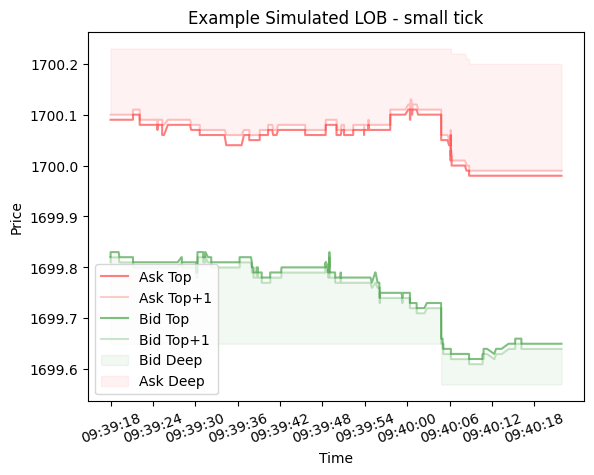

In [32]:
path = 'D:\\PhD\\results - small tick\\sim'
fnames = os.listdir(path)  
fname = fnames[20]
print(fname)
with open(path+'\\'+fname, 'rb') as f:
    T, lob = pickle.load(f)

ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob[8000:9000]:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.array(T[8000:9000])[:,1]
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5, label = 'Ask Top')
ax.plot(t, ask_d, color="r", alpha = 0.2, label = 'Ask Top+1')
# ax.plot(t, ask_m_D, color="purple", alpha = 0.2, label = 'Ask Deepm')
ax.plot(t, bid_t, color="g", alpha =0.5, label = 'Bid Top')
ax.plot(t, bid_d, color="g", alpha = 0.2, label = 'Bid Top+1')
# ax.plot(t, bid_m_D, color="cyan", alpha = 0.2, label = 'Bid Deep')
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05 , label = 'Bid Deep')
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05, label = 'Ask Deep')
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
# ax.set_xlim(min(t)+3000, min(t)+4000)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.legend(loc='lower left')
ax.set_title('Example Simulated LOB - small tick')
plt.savefig('D:\\PhD\\results - small tick\\example.png')
plt.show()

# Rough

In [9]:
T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose= False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3251714528.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 110, price0 = 1700, M_med = 50, verbose= False)
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3251714528.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(23400, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_di

initial spread:  1.099999999999909 



In [10]:
lob[0]

{'mid': 1700,
 'Ask_touch': (np.float64(1700.55), np.int64(37)),
 'Bid_touch': (np.float64(1699.45), np.int64(427)),
 'Ask_m_T': np.int64(17),
 'Ask_m_D': np.int64(2),
 'Bid_m_T': np.int64(2),
 'Bid_m_D': np.int64(2),
 'Ask_deep': (np.float64(1700.72), np.int64(178)),
 'Bid_deep': (np.float64(1699.43), np.int64(84))}

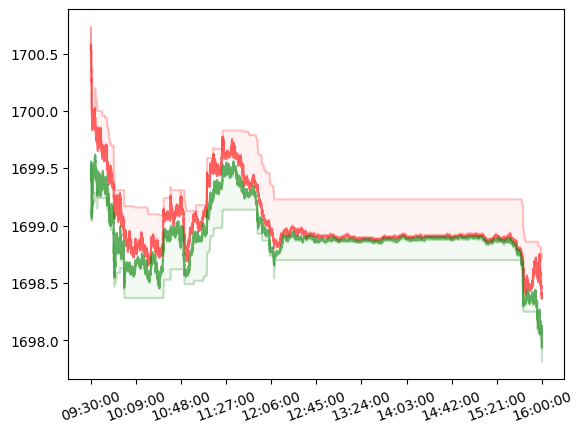

In [11]:
ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.append([0], np.array(T[1:])[:,1])
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5)
ax.plot(t, ask_d, color="r", alpha = 0.2)
ax.plot(t, ask_m_D, color="r", alpha = 0.2)
ax.plot(t, bid_t, color="g", alpha =0.5)
ax.plot(t, bid_d, color="g", alpha = 0.2)
ax.plot(t, bid_m_D, color="g", alpha = 0.2)
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

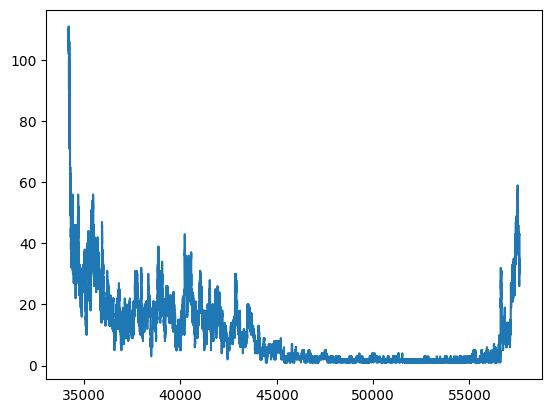

In [12]:
plt.plot(t, spread)

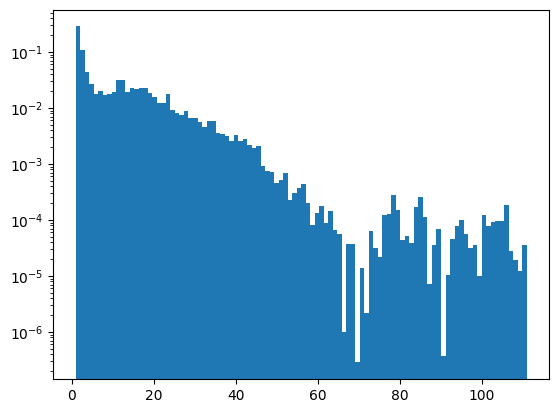

In [22]:
plt.hist(spread[1:], weights = np.diff(t), density=True,bins=100)
plt.yscale('log')
# plt.xscale('log')

In [14]:
len(spread)

245607

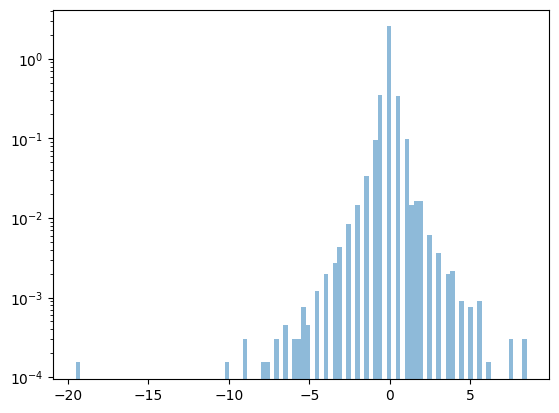

In [24]:
mid = (np.array(ask_t) + np.array(bid_t))/2
tau = 1
max_t = np.round(max(np.array(t) - 34200), decimals=0)
sample_x = np.linspace(0, max_t, int(max_t/tau))
idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
sample_y = mid[idxs]
rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
plt.hist(rets*100, bins = 100, alpha = 0.5, density = True)
plt.yscale('log')
plt.show()

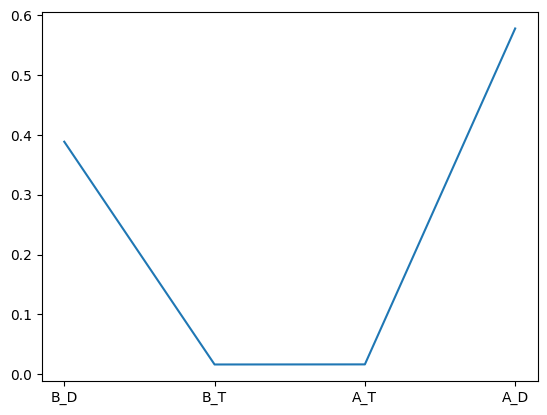

In [43]:
q_ask_t = []
q_bid_t = []
q_ask_d = []
q_bid_d= []
for r in lob:
    q_ask_t.append(r['Ask_touch'][1])
    q_bid_t.append(r['Bid_touch'][1])
    q_ask_d.append(r['Ask_deep'][1])
    q_bid_d.append(r['Bid_deep'][1])
Q= np.array([q_bid_d, q_bid_t, q_ask_t, q_ask_d])
Q = np.multiply(Q,(1./Q.sum(axis=0)))
Q_shape = Q.sum(axis=1)
Q_shape =Q_shape/Q_shape.sum()
plt.plot(['B_D', 'B_T', 'A_T', 'A_D'],Q_shape)


In [44]:
# Large tick:

In [53]:
T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 4, price0 = 45, M_med = 50, verbose= False)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3615856382.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_symmetric" , beta = 0.6, avgSpread = .95, spread0 = 4, price0 = 45, M_med = 50, verbose= False)
C:\Users\konar\AppData\Local\Temp\ipykernel_36236\3615856382.py:1: SyntaxWarning: invalid escape sequence '\P'
  T, lob , _ = simulate_smalltick.simulate_smallTick(100, "D:\PhD\\results - small tick\AMZN.OQ_ParamsInferredWCutoffEyeMu_Symm_2019-01-02_2019-12-31_CLSLogLin_10","D:\PhD\\results - small tick\\AMZN.OQ_Params_2019-01-02_2019-12-30_dictTOD_sy

initial spread:  0.04000000000000625 



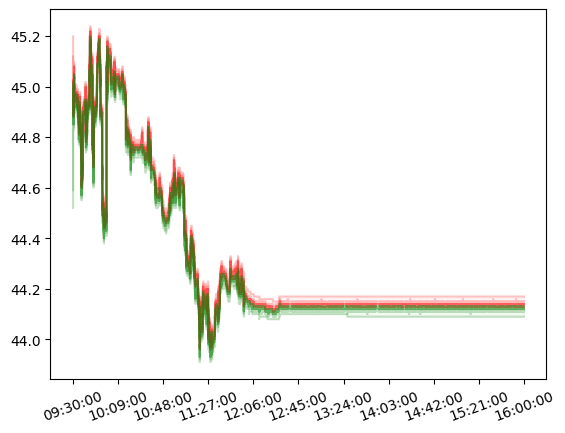

In [48]:
ask_t = []
bid_t = []
ask_d = []
bid_d= []
ask_m_D = []
bid_m_D = []
spread = []
for r in lob:
    ask_t.append(r['Ask_touch'][0])
    bid_t.append(r['Bid_touch'][0])
    ask_d.append(r['Ask_deep'][0])
    bid_d.append(r['Bid_deep'][0])
    bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
    ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
    spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
t = np.append([0], np.array(T[1:])[:,1])
t = t.astype(float) + 9.5*3600

fig, ax = plt.subplots()
ax.plot(t, ask_t, color = "r", alpha =0.5)
ax.plot(t, ask_d, color="r", alpha = 0.2)
ax.plot(t, ask_m_D, color="r", alpha = 0.2)
ax.plot(t, bid_t, color="g", alpha =0.5)
ax.plot(t, bid_d, color="g", alpha = 0.2)
ax.plot(t, bid_m_D, color="g", alpha = 0.2)
ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
count = int((max(t) - min(t))/10)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

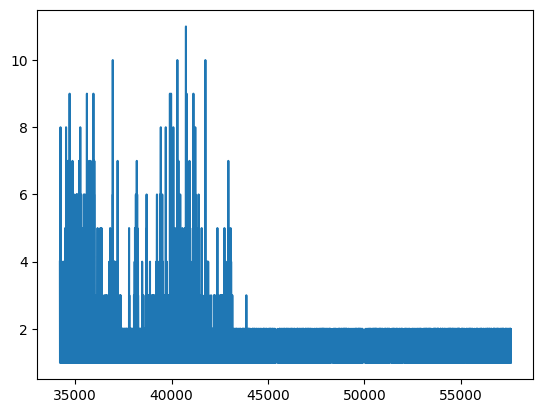

In [52]:
plt.plot(t, spread)

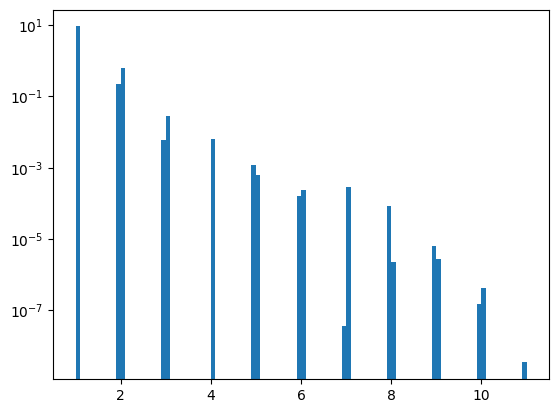

In [49]:
plt.hist(spread[1:], weights = np.diff(t), density=True,bins=100)
plt.yscale('log')
# plt.xscale('log')

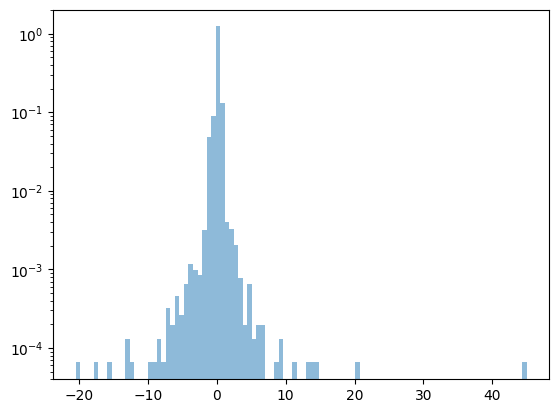

In [50]:
mid = (np.array(ask_t) + np.array(bid_t))/2
tau = 1
max_t = np.round(max(np.array(t) - 34200), decimals=0)
sample_x = np.linspace(0, max_t, int(max_t/tau))
idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
sample_y = mid[idxs]
rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
plt.hist(rets*100, bins = 100, alpha = 0.5, density = True)
plt.yscale('log')
plt.show()

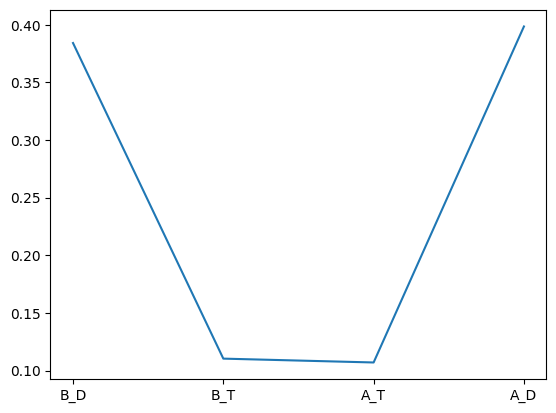

In [51]:
q_ask_t = []
q_bid_t = []
q_ask_d = []
q_bid_d= []
for r in lob:
    q_ask_t.append(r['Ask_touch'][1])
    q_bid_t.append(r['Bid_touch'][1])
    q_ask_d.append(r['Ask_deep'][1])
    q_bid_d.append(r['Bid_deep'][1])
Q= np.array([q_bid_d, q_bid_t, q_ask_t, q_ask_d])
Q = np.multiply(Q,(1./Q.sum(axis=0)))
Q_shape = Q.sum(axis=1)
Q_shape =Q_shape/Q_shape.sum()
plt.plot(['B_D', 'B_T', 'A_T', 'A_D'],Q_shape)


# Comparisons

In [2]:
path = 'D:\\PhD\\results - small tick\\sim'
fnames = os.listdir(path)       

## spr0

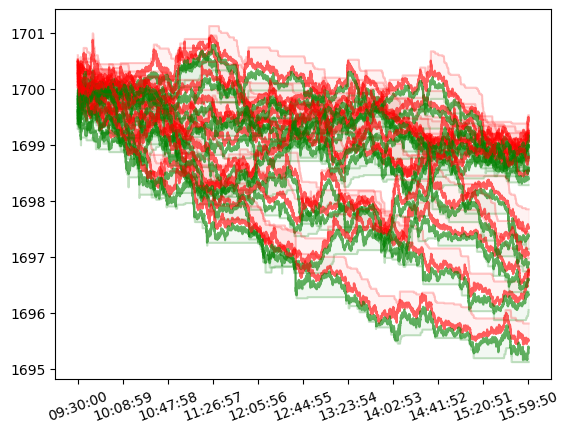

In [118]:
spreads = []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_spr0_' in fname:
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, 'Spread Distribution - various initial spread')

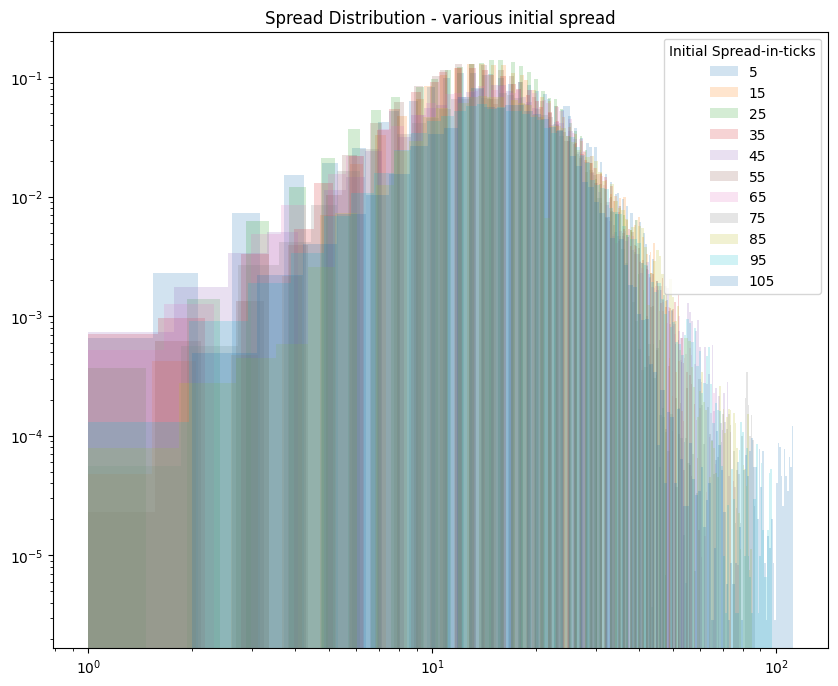

In [119]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(spreads, labels), key = lambda x: int(x[1])):
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.2)
plt.legend(loc='upper right', title = 'Initial Spread-in-ticks')
plt.xscale('log')
plt.yscale('log')
plt.title('Spread Distribution - various initial spread')

Text(0, 0.5, 'Spread In Ticks')

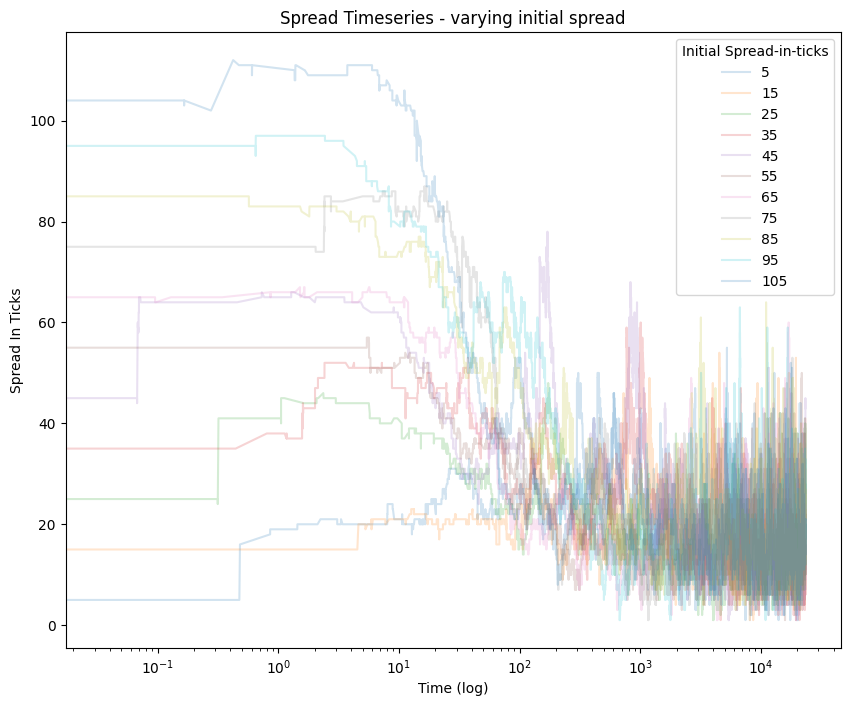

In [121]:
plt.figure(figsize=(10,8))
spreads = []
labels = []
for fname in sorted(fnames, key = lambda x: float(x.split('_')[-1])) :
    if '_spr0_' in fname:
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) #+ 9.5*3600
        plt.plot(t,spread, label=fname.split('_')[-1], alpha= 0.2)
plt.legend(loc='upper right', title= 'Initial Spread-in-ticks')
plt.xscale('log')
plt.title('Spread Timeseries - varying initial spread')
plt.xlabel('Time (log)')
plt.ylabel('Spread In Ticks')

## avgSpread, SpreadBeta:

$$\lambda^{(IS)}(s, t) = \bigg(\frac{s-1}{\alpha}\bigg)^\beta \times \lambda^{(IS)}(t)$$

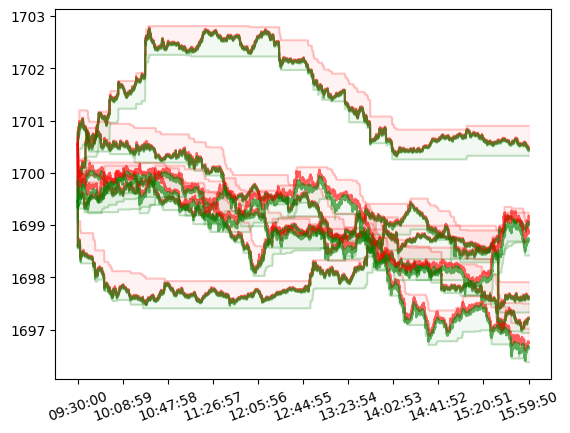

In [108]:
spreads = []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_tickness_' in fname:
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('beta_')[-1])
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, 'Spread Distribution -  various IS intensities')

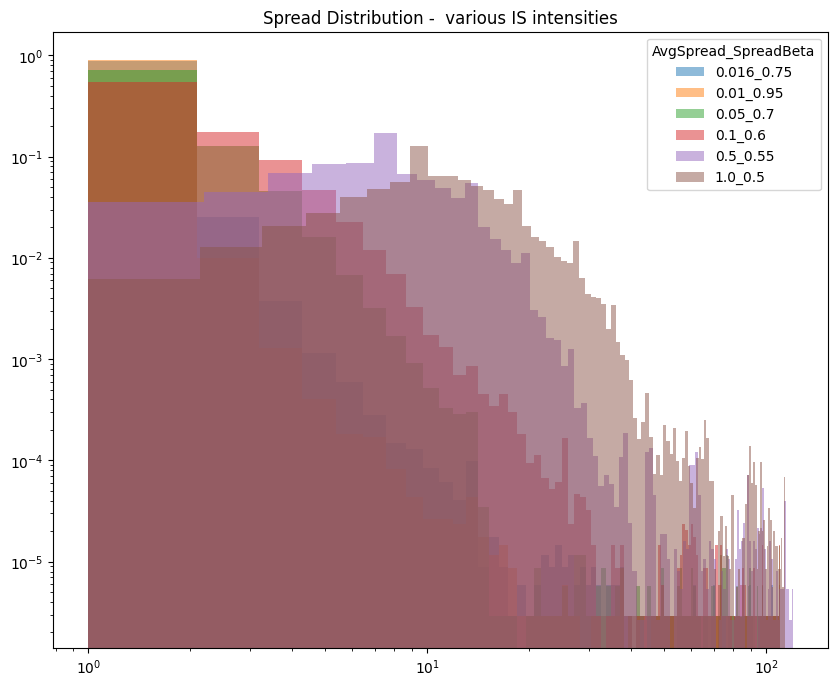

In [112]:
plt.figure(figsize=(10,8))
for s, l in zip(spreads, labels):
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
plt.xscale('log')
plt.yscale('log')
plt.title('Spread Distribution -  various IS intensities')

Text(0.5, 1.0, 'Spread Distribution - various IS intensities')

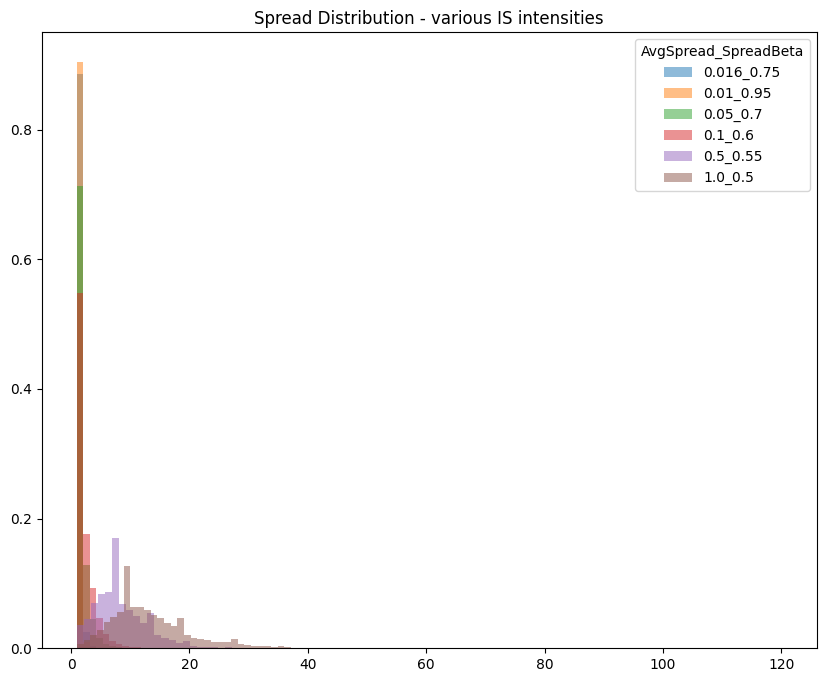

In [111]:
plt.figure(figsize=(10,8))
for s, l in zip(spreads, labels):
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
# plt.xscale('log')
# plt.yscale('log')
plt.title('Spread Distribution - various IS intensities')

Text(0.5, 1.0, 'Spread Distribution - various IS intensities')

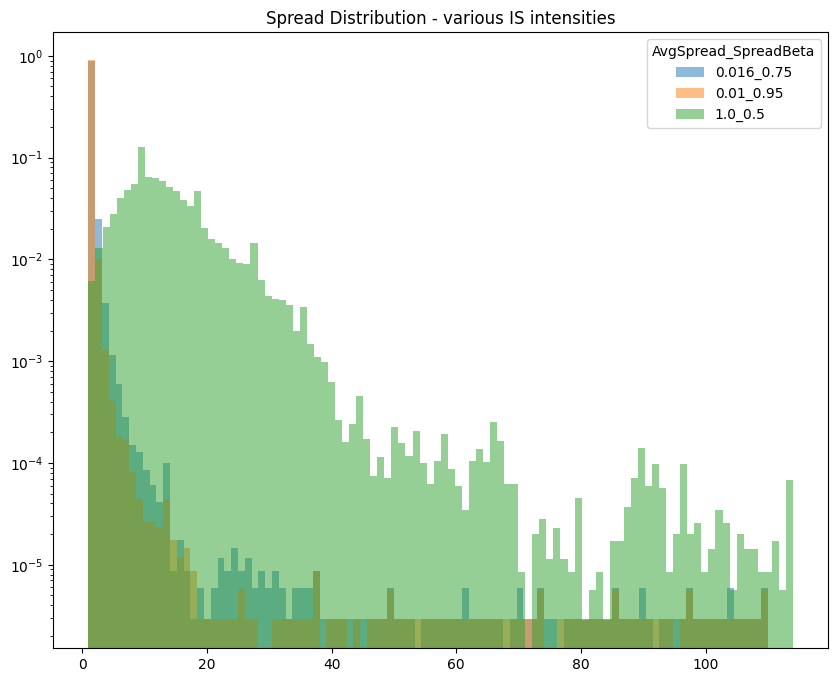

In [117]:
plt.figure(figsize=(10,8))
for s, l in zip(spreads, labels):
    if l in ['0.01_0.95', '0.016_0.75', '1.0_0.5']:
        plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = 'AvgSpread_SpreadBeta')
# plt.xscale('log')
plt.yscale('log')
plt.title('Spread Distribution - various IS intensities')

In [123]:
volumes_1 , labels = [], [] 
for fname in fnames:
    if '_tickness_' in fname:
        # if  fname.split('_')[-1] not in ['5', '20', '50']:
        #     continue
        l = fname.split('beta_')[-1]
        if l in ['0.01_0.95', '0.016_0.75', '1.0_0.5']:
            with open(path+'\\'+fname, 'rb') as f:
                T, lob = pickle.load(f)
            volumes = []
            for r in lob:
                volume = [(( - r['Bid_deep'][0] + r['mid']) + 0.01*i, r['Bid_deep'][1]/r['Bid_m_D']) for i in range(int(r['Bid_m_D']))]
                volume += [((-r['Bid_touch'][0] + r['mid']), r['Bid_touch'][1])]
                volume += [((r['Ask_touch'][0] - r['mid']), r['Ask_touch'][1])]
                volume += [((r['Ask_deep'][0] - r['mid']) + 0.01*i, r['Ask_deep'][1]/r['Ask_m_D']) for i in range(int(r['Ask_m_D']))]
                volumes += [volume]
            volumes_1.append(volumes)
            labels.append(l)

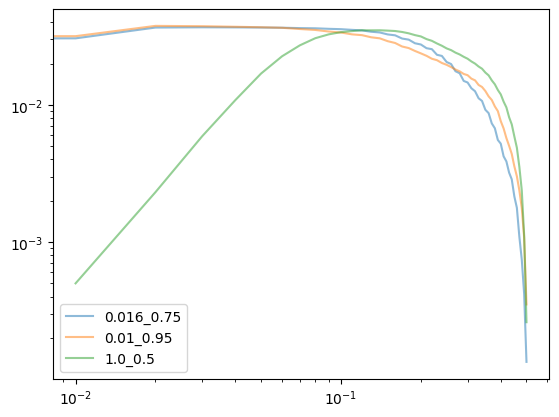

In [125]:
for volumes , label in zip(volumes_1, labels):
    dict_shape = {}
    for v in volumes:
        dists = np.array(v)[:,0]
        vols =  np.array(v)[:,1]
        for d, vol in zip(dists,vols):
            dict_shape[np.round(d, decimals=2)] = dict_shape.get(np.round(d, decimals=2), 0) + vol
    dist = list(dict_shape.keys())
    vol = np.array(list(dict_shape.values()))
    vol = vol/vol.sum()
    plt.plot(np.array(dist)[vol > 1e-4], vol[vol > 1e-4], label = label, alpha=0.5) 
plt.yscale('log')
plt.xscale('log')
plt.legend()

## M_med

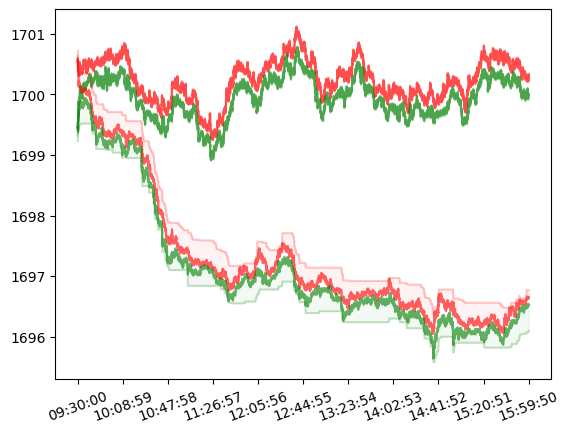

In [94]:
spreads = []
m_Ds, m_Ts = [], []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_Mmed_' in fname:
        if  fname.split('_')[-1] not in ['5', '50']:
            continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
            
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1, bid_m_T_1 = [], []
        ask_m_D_1, ask_m_T_1 = [], []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            bid_m_D_1.append(r['Bid_m_D'])
            ask_m_D_1.append(r['Ask_m_D'])
            bid_m_T_1.append(r['Bid_m_T'])
            ask_m_T_1.append(r['Ask_m_T'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
        m_Ds.append((np.array(bid_m_D_1)+np.array(ask_m_D_1))*0.5)
        m_Ts.append((np.array(bid_m_T_1)+np.array(ask_m_T_1))*0.5)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, 'Spread Distribution - various maximum depth $M_{med}$')

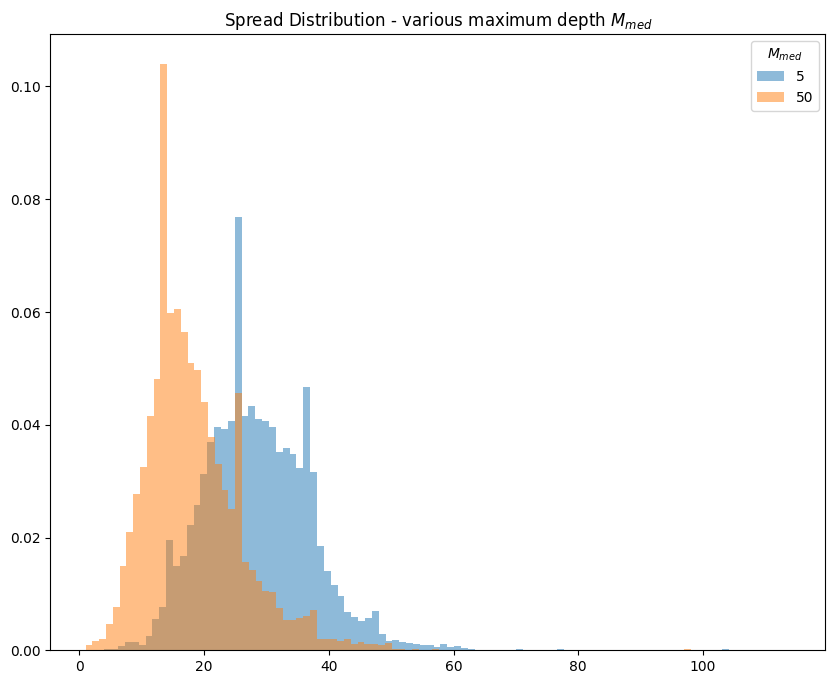

In [61]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(spreads, labels), key = lambda x: int(x[1])):
    if l not in ['5','10','20','50']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M_{med}$')
# plt.xscale('log')
# plt.yscale('log')
plt.title('Spread Distribution - various maximum depth $M_{med}$')

Text(0.5, 1.0, '$m_D$ Distribution - various maximum depth $M_{med}$')

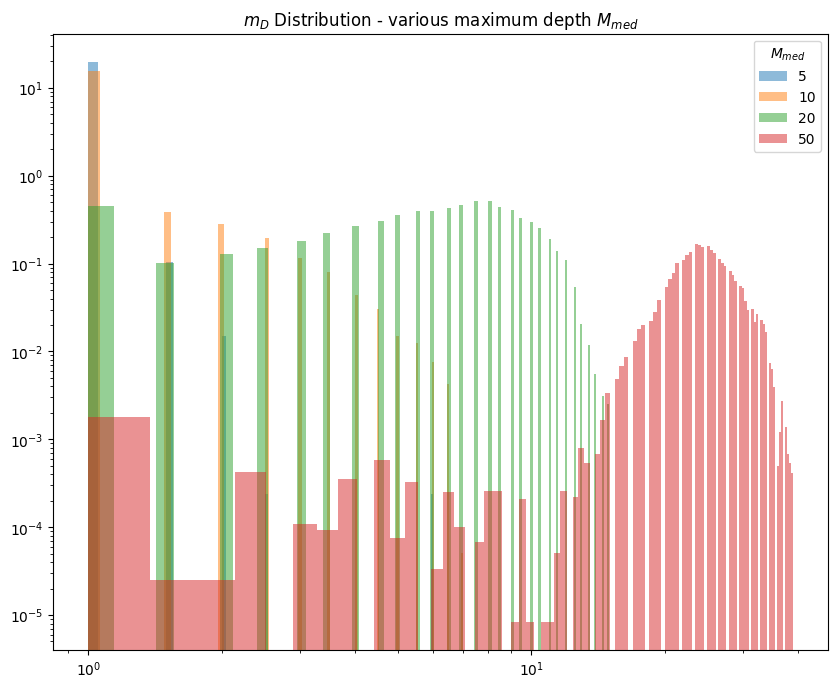

In [56]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ds, labels), key = lambda x: int(x[1])):
    if l not in ['5','10','20','50']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M_{med}$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_D$ Distribution - various maximum depth $M_{med}$')

Text(0.5, 1.0, '$m_T$ Distribution - various maximum depth $M_{med}$')

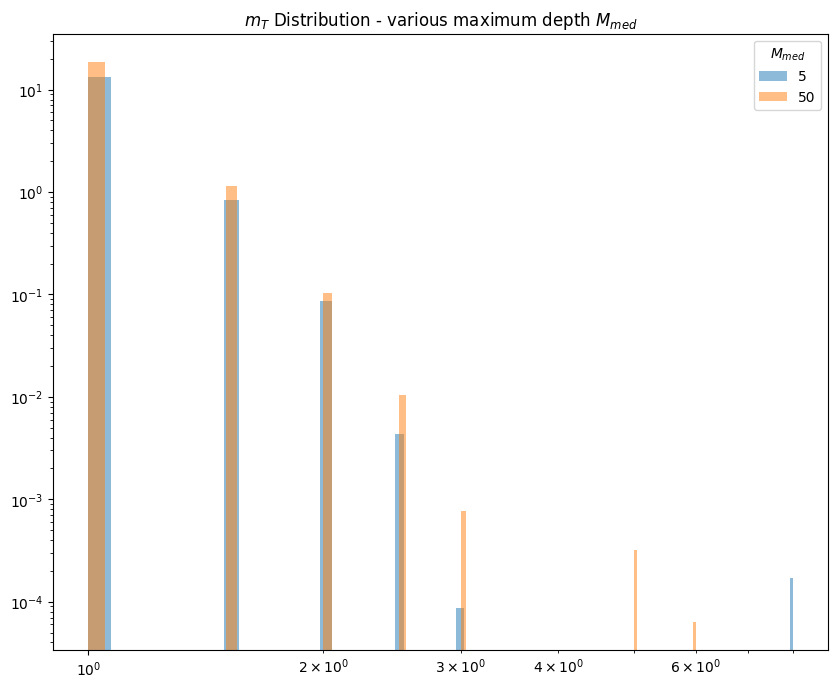

In [95]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ts, labels), key = lambda x: int(x[1])):
    if l not in ['5','10','20','50']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M_{med}$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_T$ Distribution - various maximum depth $M_{med}$')

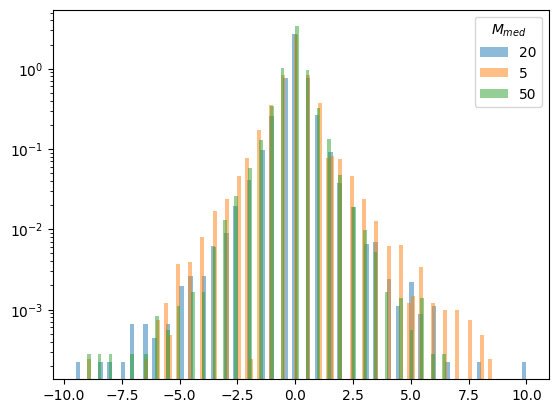

In [60]:
for fname in fnames:
    if '_Mmed_' in fname:
        if  fname.split('_')[-1] not in ['5','20', '50']:
            continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1 = []
        ask_m_D_1 = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])

        mid = (np.array(ask_t) + np.array(bid_t))/2
        tau = 1
        max_t = np.round(max(np.array(t) - 34200), decimals=0)
        sample_x = np.linspace(0, max_t, int(max_t/tau))
        idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
        sample_y = mid[idxs[idxs < len(mid)]]
        rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
        plt.hist(rets*100, bins = 100, alpha = 0.5, density = True, label = fname.split('_')[-1])
plt.legend(loc='upper right', title = '$M_{med}$')
plt.yscale('log')
plt.show()

In [88]:
volumes_1 , labels = [], [] 
for fname in fnames:
    if '_Mmed_' in fname:
        # if  fname.split('_')[-1] not in ['5', '20', '50']:
        #     continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        volumes = []
        for r in lob:
            volume = [(( - r['Bid_deep'][0] + r['mid']) + 0.01*i, r['Bid_deep'][1]/r['Bid_m_D']) for i in range(int(r['Bid_m_D']))]
            volume += [((-r['Bid_touch'][0] + r['mid']), r['Bid_touch'][1])]
            volume += [((r['Ask_touch'][0] - r['mid']), r['Ask_touch'][1])]
            volume += [((r['Ask_deep'][0] - r['mid']) + 0.01*i, r['Ask_deep'][1]/r['Ask_m_D']) for i in range(int(r['Ask_m_D']))]
            volumes += [volume]
        volumes_1.append(volumes)
        labels.append(fname.split('_')[-1])

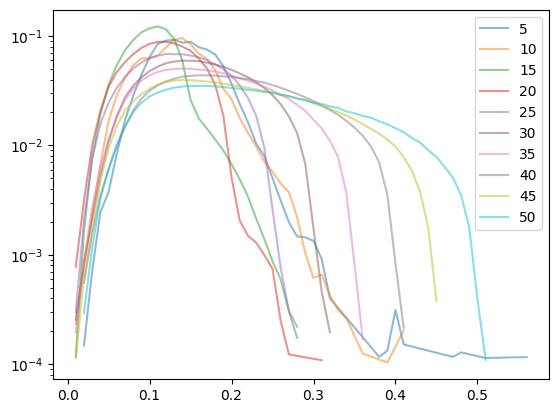

In [89]:
for volumes , label in sorted(zip(volumes_1, labels), key = lambda x: int(x[1])):
    dict_shape = {}
    for v in volumes:
        dists = np.array(v)[:,0]
        vols =  np.array(v)[:,1]
        for d, vol in zip(dists,vols):
            dict_shape[np.round(d, decimals=2)] = dict_shape.get(np.round(d, decimals=2), 0) + vol
    dist = list(dict_shape.keys())
    vol = np.array(list(dict_shape.values()))
    vol = vol/vol.sum()
    plt.plot(np.array(dist)[vol > 1e-4], vol[vol > 1e-4], label = label, alpha=0.5) 
plt.yscale('log')
plt.xscale('log')
plt.legend()

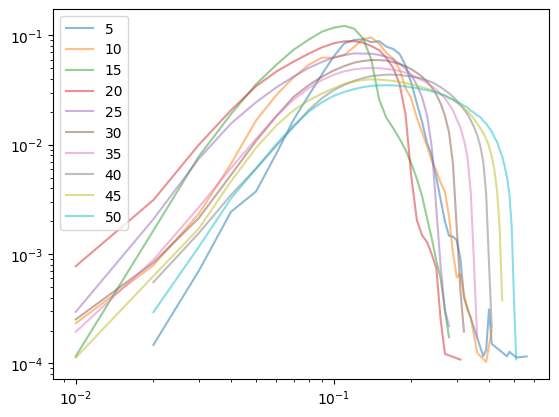

In [93]:
for volumes , label in sorted(zip(volumes_1, labels), key = lambda x: int(x[1])):
    dict_shape = {}
    for v in volumes:
        dists = np.array(v)[:,0]
        vols =  np.array(v)[:,1]
        for d, vol in zip(dists,vols):
            dict_shape[np.round(d, decimals=2)] = dict_shape.get(np.round(d, decimals=2), 0) + vol
    dist = list(dict_shape.keys())
    vol = np.array(list(dict_shape.values()))
    vol = vol/vol.sum()
    plt.plot(np.array(dist)[vol > 1e-4], vol[vol > 1e-4], label = label, alpha=0.5) 
plt.yscale('log')
plt.xscale('log')
plt.legend()

## Initial Sparsity - M0

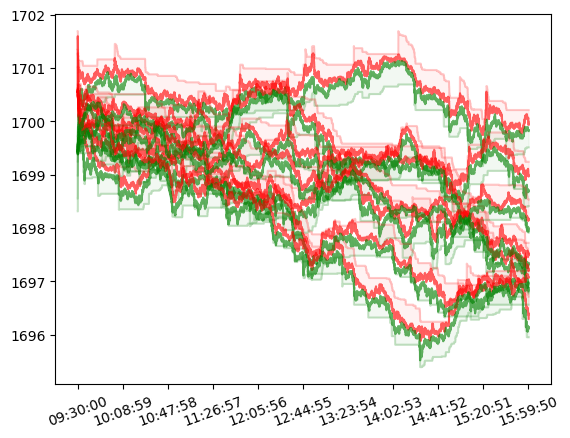

In [96]:
spreads = []
m_Ds, m_Ts = [], []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_M0_' in fname:
        # if  fname.split('_')[-1] not in ['5', '50']:
        #     continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
            
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1, bid_m_T_1 = [], []
        ask_m_D_1, ask_m_T_1 = [], []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            bid_m_D_1.append(r['Bid_m_D'])
            ask_m_D_1.append(r['Ask_m_D'])
            bid_m_T_1.append(r['Bid_m_T'])
            ask_m_T_1.append(r['Ask_m_T'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
        m_Ds.append((np.array(bid_m_D_1)+np.array(ask_m_D_1))*0.5)
        m_Ts.append((np.array(bid_m_T_1)+np.array(ask_m_T_1))*0.5)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

Text(0.5, 1.0, '$m_T$ Distribution - various maximum depth $M0$')

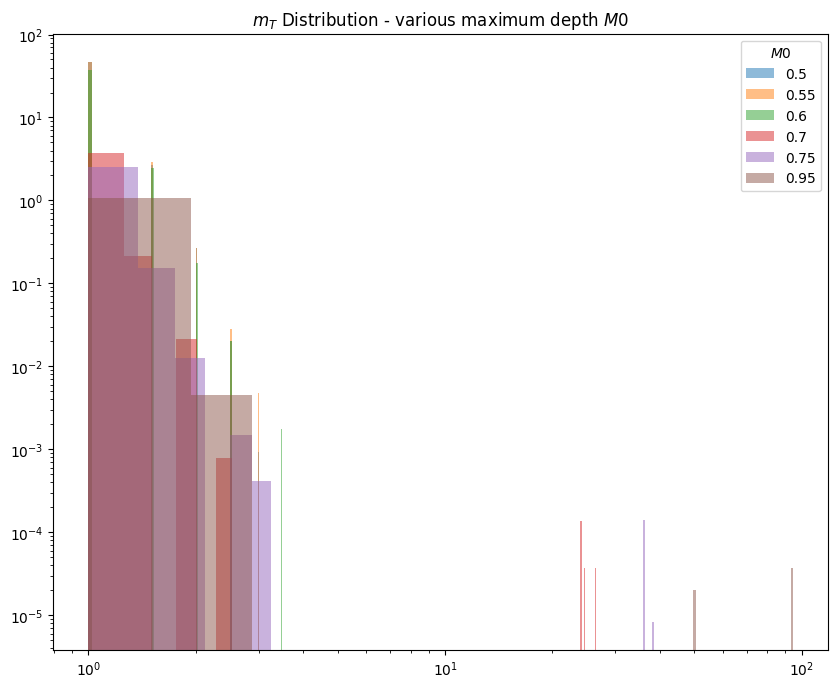

In [103]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ts, labels), key = lambda x: float(x[1])):
    # if l not in ['5','10','20','50']:
    #     continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M0$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_T$ Distribution - various maximum depth $M0$')

Text(0.5, 1.0, '$m_D$ Distribution - various maximum depth $M0$')

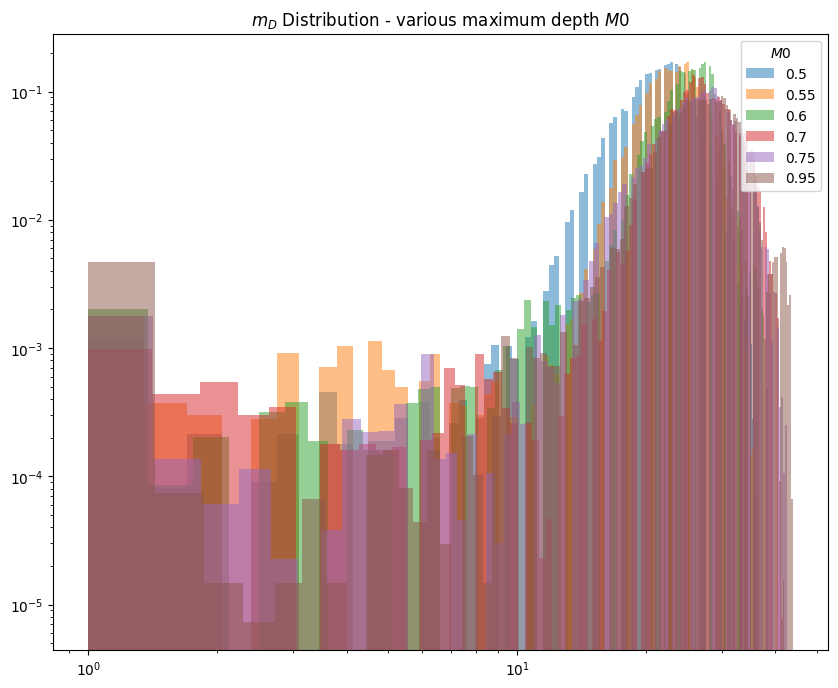

In [104]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ds, labels), key = lambda x: float(x[1])):
    # if l not in ['5','10','20','50']:
    #     continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$M0$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_D$ Distribution - various maximum depth $M0$')

## Varying Sparsity - eta

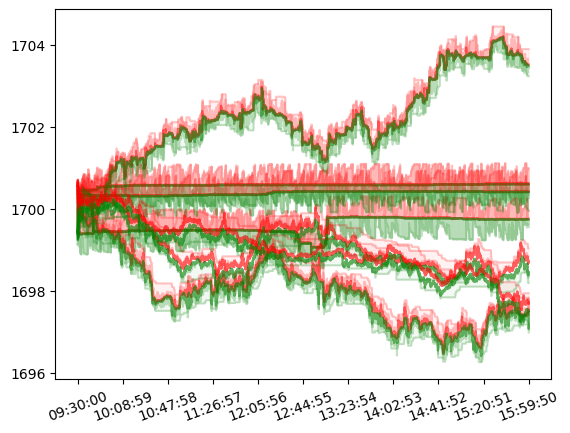

In [34]:
spreads = []
m_Ds, m_Ts = [], []
labels = []
fig, ax = plt.subplots()
for fname in fnames:
    if '_eta_' in fname:
        # if  fname.split('_')[-1] not in ['5', '50']:
        #     continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
            
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1, bid_m_T_1 = [], []
        ask_m_D_1, ask_m_T_1 = [], []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])
            ask_d.append(r['Ask_deep'][0])
            bid_d.append(r['Bid_deep'][0])
            bid_m_D.append(r['Bid_deep'][0] - 0.01*r['Bid_m_D'])
            ask_m_D.append(r['Ask_deep'][0] + 0.01*r['Ask_m_D'])
            bid_m_D_1.append(r['Bid_m_D'])
            ask_m_D_1.append(r['Ask_m_D'])
            bid_m_T_1.append(r['Bid_m_T'])
            ask_m_T_1.append(r['Ask_m_T'])
            spread.append(100*(r['Ask_touch'][0] - r['Bid_touch'][0]))
        t = np.append([0], np.array(T[1:])[:,1])
        t = t.astype(float) + 9.5*3600
        
        
        ax.plot(t, ask_t, color = "r", alpha =0.5)
        ax.plot(t, ask_d, color="r", alpha = 0.2)
        ax.plot(t, ask_m_D, color="r", alpha = 0.2)
        ax.plot(t, bid_t, color="g", alpha =0.5)
        ax.plot(t, bid_d, color="g", alpha = 0.2)
        ax.plot(t, bid_m_D, color="g", alpha = 0.2)
        ax.fill_between(t, bid_d, bid_m_D, color="g", alpha = 0.05)
        ax.fill_between(t, ask_d, ask_m_D, color="r", alpha = 0.05)
        count = int((max(t) - min(t))/10)
        spreads.append(spread)
        labels.append(fname.split('_')[-1])
        m_Ds.append((np.array(bid_m_D_1)+np.array(ask_m_D_1))*0.5)
        m_Ts.append((np.array(bid_m_T_1)+np.array(ask_m_T_1))*0.5)
ax.ticklabel_format(useOffset=False)
ax.set_xticks(ticks = np.arange(min(t), max(t), count), labels = [time.strftime('%H:%M:%S', time.gmtime(x)) for x in np.arange(min(t), max(t), count)], rotation = 20)
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\65748692.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(loc='upper right', title = '$\hat{\eta}$')
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\65748692.py:11: SyntaxWarning: invalid escape sequence '\h'
  plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')


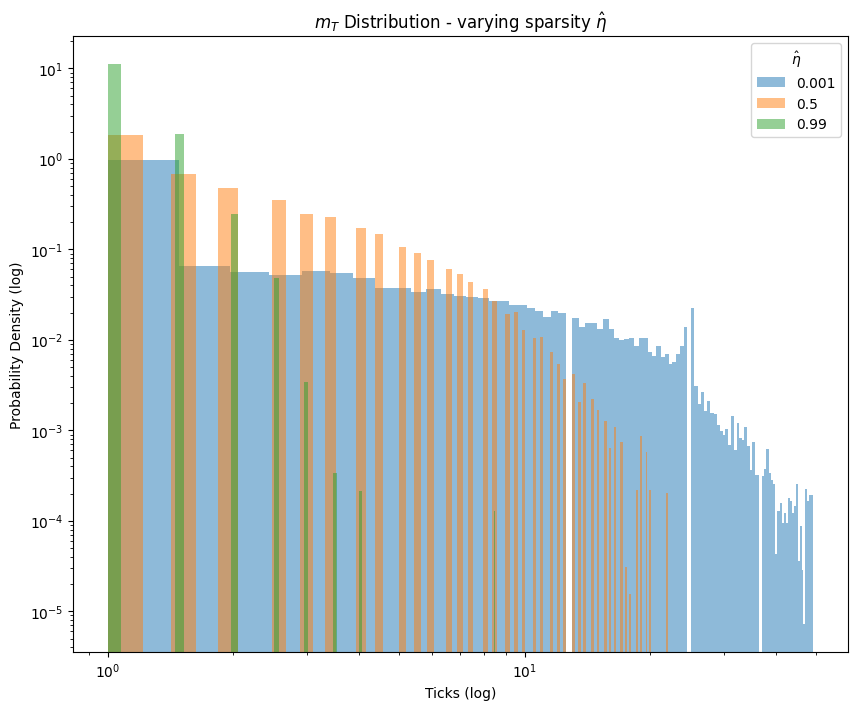

In [38]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ts, labels), key = lambda x: float(x[1])):
    if l not in ['0.001', '0.5', '0.99']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$\hat{\eta}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ticks (log)')
plt.ylabel('Probability Density (log)')
plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_m_T.png')

<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:9: SyntaxWarning: invalid escape sequence '\h'
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\1646526327.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(loc='upper right', title = '$\hat{\eta}$')
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\1646526327.py:9: SyntaxWarning: invalid escape sequence '\h'
  plt.title('$m_D$ Distribution - varying sparsity $\hat{\eta}$')


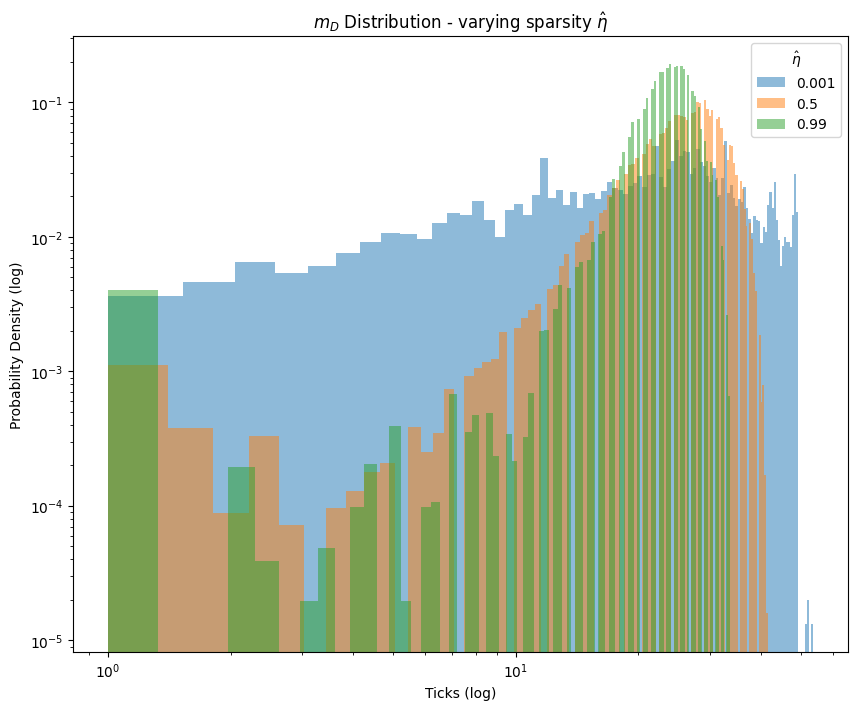

In [39]:
plt.figure(figsize=(10,8))
for s, l in sorted(zip(m_Ds, labels), key = lambda x: float(x[1])):
    if l not in ['0.001', '0.5', '0.99']:
        continue
    plt.hist(s, bins=100, label=l, density=True, histtype = 'stepfilled', alpha = 0.5)
plt.legend(loc='upper right', title = '$\hat{\eta}$')
plt.xscale('log')
plt.yscale('log')
plt.title('$m_D$ Distribution - varying sparsity $\hat{\eta}$')
plt.xlabel('Ticks (log)')
plt.ylabel('Probability Density (log)')
# plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_m_D.png')

<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
<>:28: SyntaxWarning: invalid escape sequence '\h'
<>:30: SyntaxWarning: invalid escape sequence '\h'
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\316043354.py:28: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(loc='upper right', title = '$\hat{\eta}$')
C:\Users\konar\AppData\Local\Temp\ipykernel_21528\316043354.py:30: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Absolute Returns (in ticks) Distribution - varying sparsity $\hat{\eta}$')


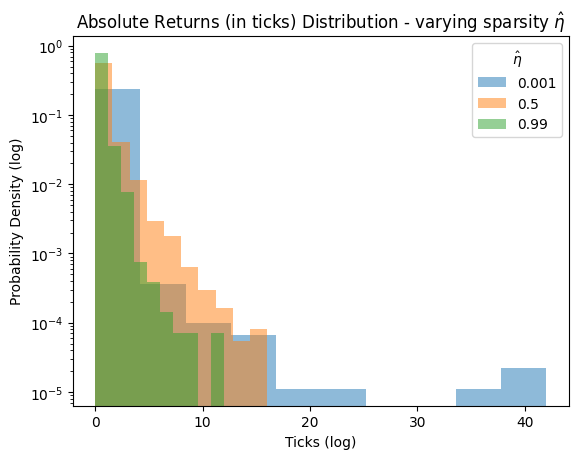

In [55]:
for fname in fnames:
    if '_eta_' in fname:
        if  fname.split('_')[-1] not in ['0.001', '0.5', '0.99']:
            continue
        with open(path+'\\'+fname, 'rb') as f:
            T, lob = pickle.load(f)
        ask_t = []
        bid_t = []
        ask_d = []
        bid_d= []
        ask_m_D = []
        bid_m_D = []
        bid_m_D_1 = []
        ask_m_D_1 = []
        spread = []
        for r in lob:
            ask_t.append(r['Ask_touch'][0])
            bid_t.append(r['Bid_touch'][0])

        mid = (np.array(ask_t) + np.array(bid_t))/2
        tau = 1
        max_t = np.round(max(np.array(t) - 34200), decimals=0)
        sample_x = np.linspace(0, max_t, int(max_t/tau))
        idxs = np.searchsorted(np.array(t) - 34200, sample_x)[1:-1] - 1
        sample_y = mid[idxs[idxs < len(mid)]]
        rets = np.diff(sample_y)# np.exp(np.diff(np.log(sample_y))) - 1
        plt.hist(np.abs(rets)*100, alpha = 0.5, density = True,  histtype = 'stepfilled', label = fname.split('_')[-1])
plt.legend(loc='upper right', title = '$\hat{\eta}$')
plt.yscale('log')
plt.title('Absolute Returns (in ticks) Distribution - varying sparsity $\hat{\eta}$')

plt.xlabel('Ticks (log)')
plt.ylabel('Probability Density (log)')
# plt.title('$m_T$ Distribution - varying sparsity $\hat{\eta}$')
plt.savefig('D:\\PhD\\results - small tick\\ergStudy_eta_ret.png')
plt.show()